# Problem statement 1: predicting turbine energy yield (TEY) using ambient variables as features.

In [69]:
import pandas as pd

In [70]:
turbine = pd.read_csv("gas_turbines.csv")
turbine

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [71]:
turbine1 =turbine.drop(columns='TEY')
turbine1

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,10.533,6.2494,93.227


In [72]:
def norm(i):
    x=(i-i.min())/(i.max()-i.min())
    return x

In [73]:
x=turbine1.iloc[::,0:3]
x

,AT,AP,AH
0,6.8594,1007.9,96.799
1,6.7850,1008.4,97.118
2,6.8977,1008.8,95.939
3,7.0569,1009.2,95.249
4,7.3978,1009.7,95.150
...,...,...,...
15034,9.0301,1005.6,98.460
15035,7.8879,1005.9,99.093
15036,7.2647,1006.3,99.496
15037,7.0060,1006.8,99.008


In [74]:
X= norm(x)
X

,AT,AP,AH
0,0.184182,0.456050,0.951314
1,0.182020,0.466391,0.955881
2,0.185295,0.474664,0.939003
3,0.189922,0.482937,0.929126
4,0.199830,0.493278,0.927708
...,...,...,...
15034,0.247272,0.408480,0.975092
15035,0.214075,0.414685,0.984153
15036,0.195962,0.422958,0.989922
15037,0.188443,0.433299,0.982936


In [75]:
Y= turbine.iloc[::,7:8:]
Y

,TEY
0,114.70
1,114.72
2,114.71
3,114.72
4,114.72
...,...
15034,111.61
15035,111.78
15036,110.19
15037,110.74


In [76]:
from sklearn.model_selection import train_test_split

In [77]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2)

In [78]:
xtrain

,AT,AP,AH
3354,0.552267,0.559462,0.848589
7615,0.283163,0.784902,0.853899
4242,0.702965,0.491210,0.754438
5815,0.349720,0.489142,0.852540
11301,0.827882,0.573940,0.253822
...,...,...,...
1114,0.221655,0.865564,0.492084
3684,0.748392,0.499483,0.774178
5395,0.491146,0.625646,0.555600
1275,0.382940,0.836608,0.683835


In [79]:
import numpy as np

In [80]:
import tensorflow  as tf
import numpy

In [81]:
import math
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError

In [82]:
hidden_units1 = 200
hidden_units2 = 450
hidden_units3 = 250
learning_rate = 0.01
# Creating model using the Sequential in tensorflow
def build_model_using_sequential():
  model = Sequential([
    Dense(3, kernel_initializer='normal', activation='relu'),   
    Dense(hidden_units1, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units2, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units3, kernel_initializer='normal', activation='relu'),
    Dense(1, kernel_initializer='normal', activation='linear')
  ])
  return model
# build the model
model = build_model_using_sequential()

In [83]:
# loss function
msle = MeanSquaredLogarithmicError()
model.compile(
    loss=msle, 
    optimizer=Adam(learning_rate=learning_rate), 
    metrics=[msle]
)
# train the model
history = model.fit(
    xtrain, 
    ytrain, 
    epochs=20, 
    batch_size=64,
    validation_split=0.2
)

Epoch 1/20
151/151 [==============================] - 2s 8ms/step - loss: 0.7497 - mean_squared_logarithmic_error: 0.7467 - val_loss: 0.0142 - val_mean_squared_logarithmic_error: 0.0142
Epoch 2/20
151/151 [==============================] - 1s 7ms/step - loss: 0.0185 - mean_squared_logarithmic_error: 0.0185 - val_loss: 0.0141 - val_mean_squared_logarithmic_error: 0.0142
Epoch 3/20
151/151 [==============================] - 1s 7ms/step - loss: 0.0178 - mean_squared_logarithmic_error: 0.0178 - val_loss: 0.0139 - val_mean_squared_logarithmic_error: 0.0139
Epoch 4/20
151/151 [==============================] - 1s 7ms/step - loss: 0.0170 - mean_squared_logarithmic_error: 0.0170 - val_loss: 0.0140 - val_mean_squared_logarithmic_error: 0.0140
Epoch 5/20
151/151 [==============================] - 1s 7ms/step - loss: 0.0166 - mean_squared_logarithmic_error: 0.0165 - val_loss: 0.0139 - val_mean_squared_logarithmic_error: 0.0139
Epoch 6/20
151/151 [==============================] - 1s 7ms/step - lo

In [84]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 3)                 12        
                                                                 
 dense_29 (Dense)            (None, 200)               800       
                                                                 
 dropout_4 (Dropout)         (None, 200)               0         
                                                                 
 dense_30 (Dense)            (None, 450)               90450     
                                                                 
 dropout_5 (Dropout)         (None, 450)               0         
                                                                 
 dense_31 (Dense)            (None, 250)               112750    
                                                                 
 dense_32 (Dense)            (None, 1)                

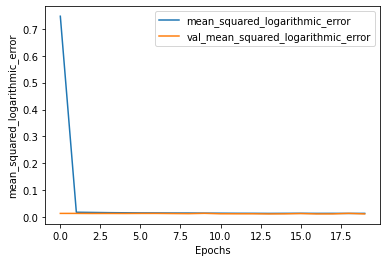

In [85]:
def plot_history(history, key):
  plt.plot(history.history[key])
  plt.plot(history.history['val_'+key])
  plt.xlabel("Epochs")
  plt.ylabel(key)
  plt.legend([key, 'val_'+key])
  plt.show()
# Plot the history
plot_history(history, 'mean_squared_logarithmic_error')

In [86]:
#Hence as epochs are increasing loss decreases

In [87]:
#Predicting the test data
ypred = model.predict(xtest)

In [88]:
ypred

array([[130.46785],
       [133.43294],
       [129.64314],
       ...,
       [129.57423],
       [138.26134],
       [134.18742]], dtype=float32)

In [89]:
ypred.shape

(3008, 1)

In [90]:
from sklearn.metrics import mean_squared_log_error

In [91]:
mean_squared_log_error(ytest,ypred)

0.012477239064036303

# Problem statement 2: PREDICT THE BURNED AREA OF FOREST FIRES WITH NEURAL NETWORKS

In [92]:
forestfire = pd.read_csv("forestfires.csv")
forestfire

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [93]:
forestfire= forestfire.drop(columns=['month','day'])

In [94]:
forestfire

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,large
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,large
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,large
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,small


In [95]:
from sklearn import preprocessing

In [96]:
label_encoder = preprocessing.LabelEncoder()

In [97]:
forestfire['size_category']=label_encoder.fit_transform(forestfire.size_category)

In [98]:
forestfire

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,1,0,0,0,0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,1,0,0,0,0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,1


In [99]:
x= forestfire.iloc[::,0:28:]
x

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,0,1,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,0,1,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,0


In [100]:
y= forestfire.iloc[::,28:29:]
y

,size_category
0,1
1,1
2,1
3,1
4,1
...,...
512,0
513,0
514,0
515,1


In [101]:
x_train, x_test, y_train,y_test = train_test_split(x,y,test_size=0.2)
x_train

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
57,92.6,46.5,691.8,8.8,13.8,50,2.7,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0
375,91.2,94.3,744.4,8.4,15.4,57,4.9,0.0,39.35,0,...,0,0,0,0,0,0,0,0,0,1
431,92.1,178.0,605.3,9.6,23.3,40,4.0,0.0,6.36,0,...,0,0,0,0,0,0,0,0,0,0
183,91.7,48.5,696.1,11.1,16.8,45,4.5,0.0,6.83,0,...,0,0,0,0,0,0,0,0,1,0
30,94.3,85.1,692.3,15.9,25.4,24,3.6,0.0,0.00,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,95.1,141.3,605.8,17.7,28.7,33,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,0
420,91.7,191.4,635.9,7.8,26.2,36,4.5,0.0,185.76,0,...,0,0,0,0,0,0,0,0,0,0
152,90.1,51.2,424.1,6.2,24.6,43,1.8,0.0,1.43,0,...,0,0,0,1,0,0,0,0,0,0
324,88.1,53.3,726.9,5.4,13.7,56,1.8,0.0,4.42,0,...,0,0,0,0,0,0,0,0,0,1


In [105]:
y_train

,size_category
57,1
375,0
431,0
183,0
30,1
...,...
490,1
420,0
152,1
324,1


In [115]:
# create model
model2 = tf.keras.models.Sequential()
model2.add(tf.keras.layers.Dense(80, input_dim=28, activation='sigmoid'))
model2.add(tf.keras.layers.Dense(100,  activation='relu'))
model2.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [116]:
model2.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 80)                2320      
                                                                 
 dense_37 (Dense)            (None, 100)               8100      
                                                                 
 dense_38 (Dense)            (None, 1)                 101       
                                                                 
Total params: 10,521
Trainable params: 10,521
Non-trainable params: 0
_________________________________________________________________


In [117]:
# Compile model
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [137]:
# Fit the model
history=model2.fit(x, y, validation_split=0.20, epochs=10, batch_size=100)

Epoch 1/10
5/5 [==============================] - 0s 25ms/step - loss: 0.0179 - accuracy: 0.9927 - val_loss: 0.0882 - val_accuracy: 0.9519
Epoch 2/10
5/5 [==============================] - 0s 12ms/step - loss: 0.0161 - accuracy: 0.9976 - val_loss: 0.0676 - val_accuracy: 0.9712
Epoch 3/10
5/5 [==============================] - 0s 13ms/step - loss: 0.0170 - accuracy: 0.9952 - val_loss: 0.0748 - val_accuracy: 0.9519
Epoch 4/10
5/5 [==============================] - 0s 12ms/step - loss: 0.0177 - accuracy: 0.9976 - val_loss: 0.0833 - val_accuracy: 0.9519
Epoch 5/10
5/5 [==============================] - 0s 13ms/step - loss: 0.0168 - accuracy: 0.9952 - val_loss: 0.0884 - val_accuracy: 0.9519
Epoch 6/10
5/5 [==============================] - 0s 11ms/step - loss: 0.0148 - accuracy: 1.0000 - val_loss: 0.0663 - val_accuracy: 0.9808
Epoch 7/10
5/5 [==============================] - 0s 11ms/step - loss: 0.0169 - accuracy: 0.9976 - val_loss: 0.1173 - val_accuracy: 0.9423
Epoch 8/10
5/5 [===========

In [138]:
# evaluate the model
scores = model2.evaluate(x, y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

17/17 [==============================] - 0s 2ms/step - loss: 0.0330 - accuracy: 0.9884
accuracy: 98.84%


In [139]:
# Visualize training history

# list all data in history
model.history.history.keys()
import matplotlib.pyplot as plt

In [140]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

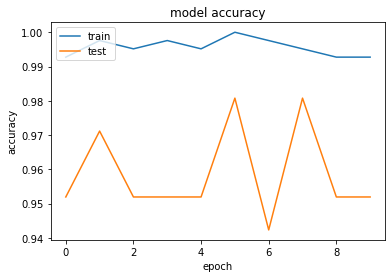

In [141]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [142]:
#hence test accuracy is in good range as like of train accuracy for epoch between 0 to 8